<a href="https://colab.research.google.com/github/sureshnaidugolla/myrepo/blob/GP/FFT_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

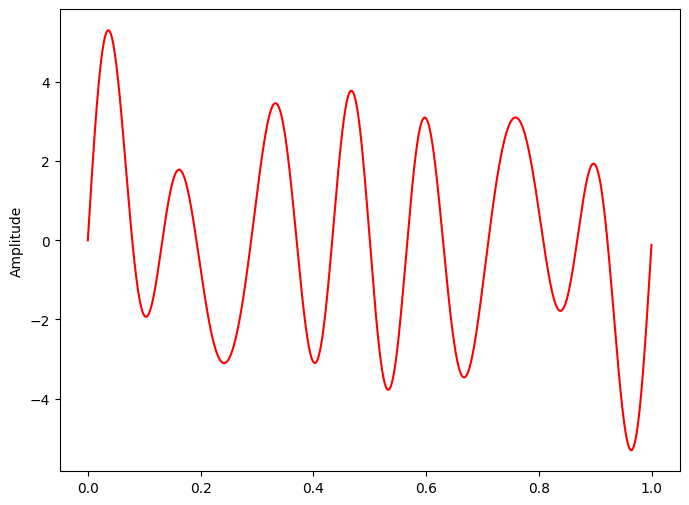

[0.000e+00 5.000e-04 1.000e-03 ... 9.985e-01 9.990e-01 9.995e-01]
[0.000e+00 1.000e+00 2.000e+00 ... 1.997e+03 1.998e+03 1.999e+03]


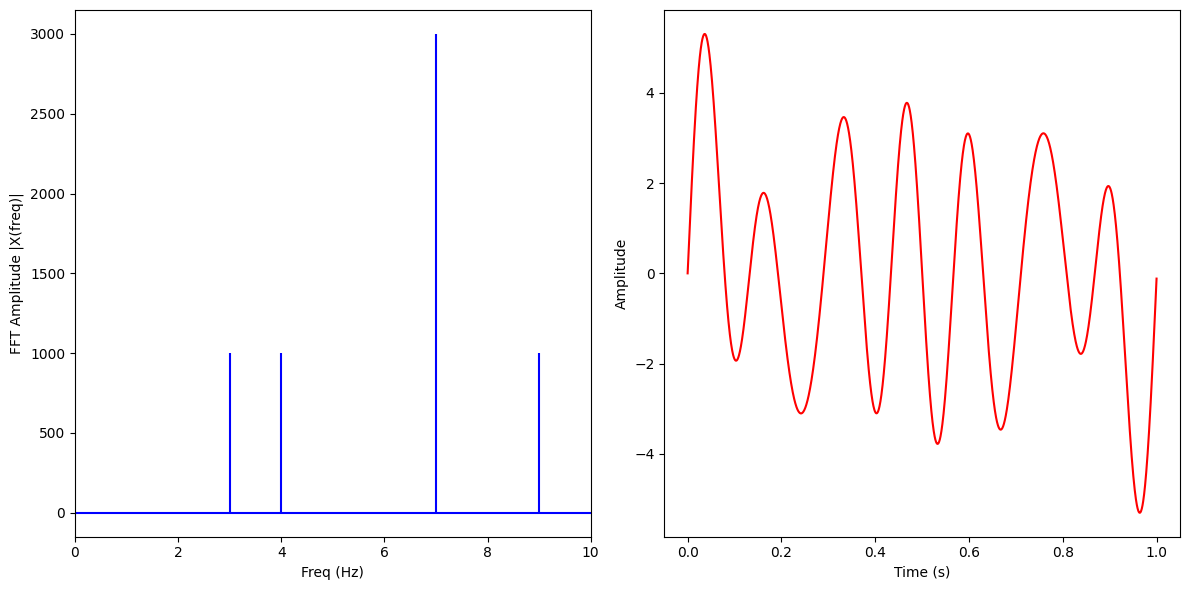

In [ ]:
### https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

π=np.pi

#plt.style.use('seaborn-v0_8-<style>') #%matplotlib inline

# sampling rate ### MAX freq!!!
f_max = 2000
t_max = 1.
# sampling interval
dt = 1./f_max
t  = np.arange(0,t_max,dt)



A  = 3.0* np.sin(2*π* 7.*t) ## sin with freq = 1
A += 1.0* np.sin(2*π* 4.*t) ## sin with freq = 4
A += 1.0* np.sin(2*π* 3.*t) ## sin with freq = 4
A += 1.0* np.sin(2*π* 9.*t) ## sin with freq = 4
#A += 0.5* np.sin(2*π* 7.*t) ## sin with freq = 7

plt.figure(figsize = (8, 6))
plt.plot(t, A, 'r')
plt.ylabel('Amplitude')
plt.show()

####################

X = fft(A) / t_max
N = len(t) ## len(A)
##T = N/f

f = np.arange(N) * (f_max/N) ##/T
print(t)
print(f)
#f = np.arange(0,f_max,df)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(f, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.plot(t, ifft(X).real, 'r')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

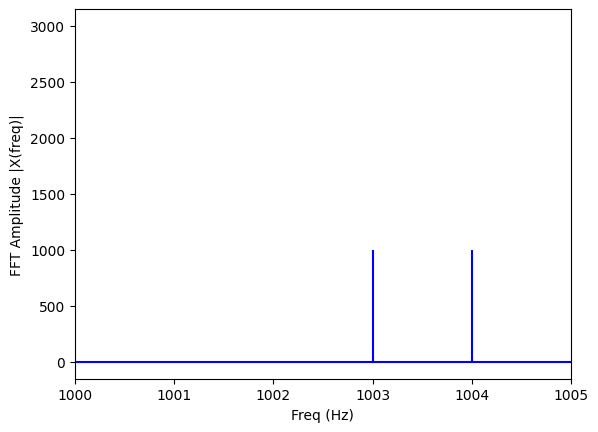

In [ ]:
plt.stem(np.fft.fftshift(f), np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(1000,1005)
plt.show()

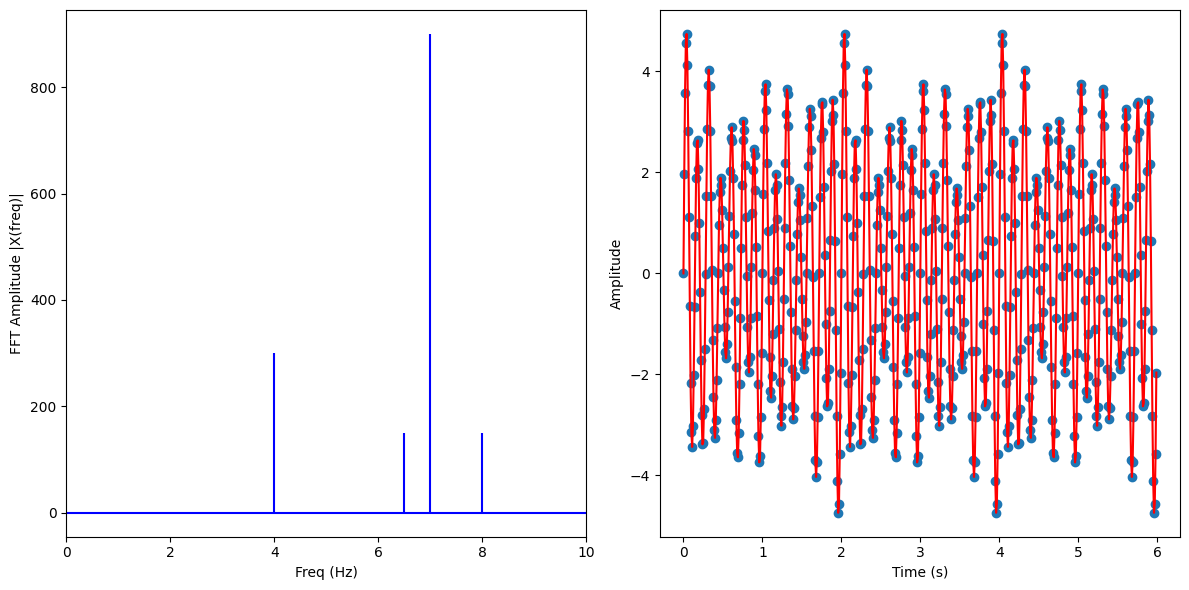

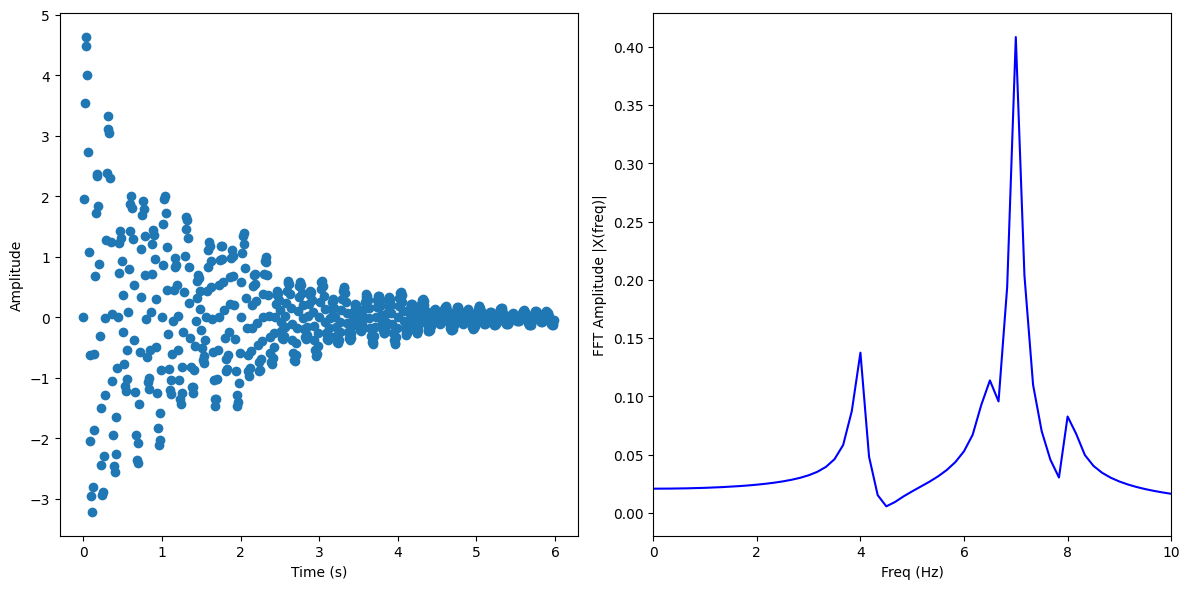

1.2153442680392448

In [ ]:
### https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.04-FFT-in-Python.html

import numpy as np
from numpy.fft import fft, ifft
import matplotlib.pyplot as plt

π=np.pi

#plt.style.use('seaborn-v0_8-<style>') #%matplotlib inline

# sampling rate ### MAX freq!!!
f_max = 100
t_max = 6. ## max REAL-time
######################


# sampling interval
dt = 1./f_max


t  = np.arange(0, t_max, dt)
N  = len(t)
f  = np.arange(N) * (f_max/N) ##/T

t = np.arange(N) / f_max

###
##t  = 1/np.arange(N) * (N/f_max)

#print(t)
#print(f)

A  = 3.0* np.sin(2*π* 7.*t) ## sin with freq = 7
A += 1.0* np.sin(2*π* 4.*t) ## sin with freq = 4
A += 0.5* np.sin(2*π* 8.*t) ## sin with freq = 8
A += 0.5* np.sin(2*π* 6.5*t) ## sin with freq = 7

####################

X = fft(A) #/ t_max


#f = np.arange(0,f_max,df)

plt.figure(figsize = (12, 6))
plt.subplot(121)

plt.stem(f, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.subplot(122)
plt.scatter(t, A )
plt.plot(t, ifft(X).real, 'r') ## *t_max multiply by t_max
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()


γ     = 0.6
A_fat = A*np.exp(-γ*t)




plt.figure(figsize = (12, 6))
plt.subplot(121)
plt.scatter(t, A_fat )
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(122)
plt.plot(f, np.abs(ifft(A_fat)), 'b')
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.xlim(0, 10)

plt.tight_layout()
plt.show()


df = f[5] - f[4]
np.sum( np.abs(ifft(A_fat))*df )

## reconstruct the curve from the data

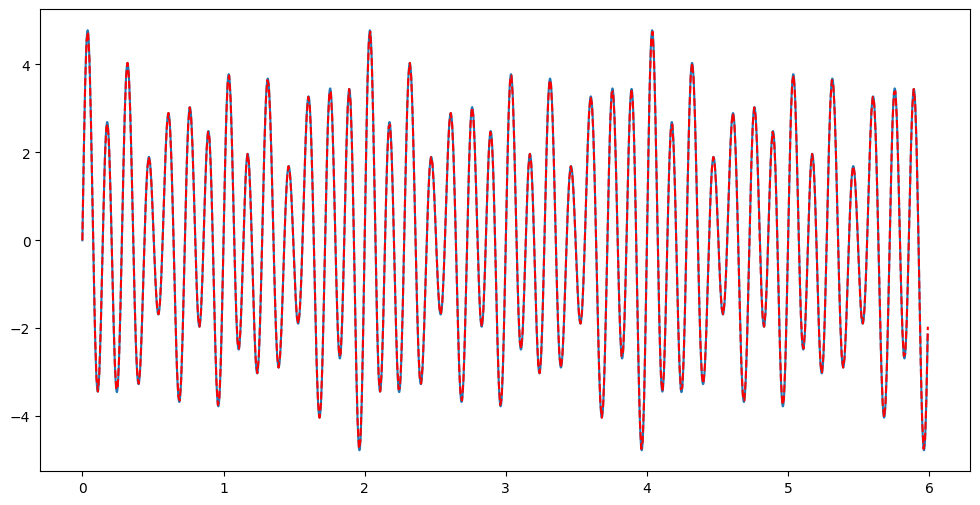

In [ ]:
i = np.where( abs( X ) > (t_max*f_max/2)*0.1 )[0] ### !!! where (t_max*f_max/2)*0.1 implies 0.1 is the smallest amplitude we will consider
i = (i[:len(i)//2])

tt = np.arange(0, t_max-0.01, 0.001)

amps = np.abs(X)[i] / (t_max*f_max/2 )

plt.figure(figsize = (12, 6))
plt.plot( tt, np.sum( amps[:,None] *np.sin(2*π* f[i][:,None]*tt[None,:]), axis=0))
plt.plot(t, ifft(X).real, 'r', linestyle="dashed")
plt.show()



# make it fat, dress spectra with lorentzian

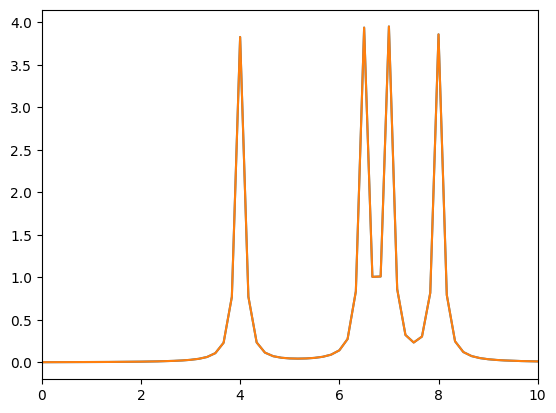

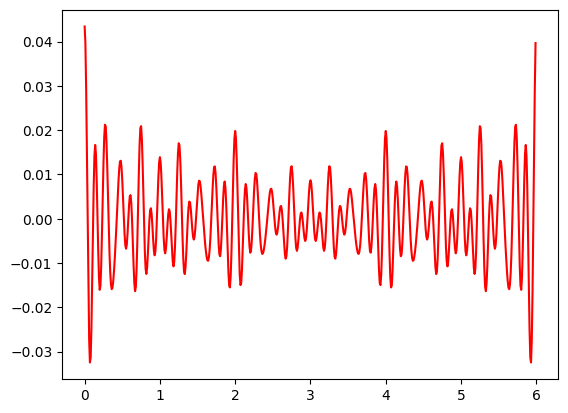

2.1713210797840183

In [ ]:
def dressing(x0, f, γ=1.0):
    return np.sum( 1/( π*γ * ( 1 + ( (f[:,None] - x0[None,:])/γ )**2) ), axis=1)


f, np.abs(X)
df = (f[5] - f[4])/2

γ = 1 ##INPUT
γ*=df ##in code


i = np.where( abs( X ) > (t_max*f_max/2)*0.1 )[0] ### !!! where (t_max*f_max/2)*0.1 implies 0.1 is the smallest amplitude we will consider
i = (i[:len(i)//2])

plt.plot( f, dressing(f[i], f, γ=df) ) #*np.abs(X)
plt.plot( f, dressing(f[i], f, γ=df) ) #*np.abs(X)
plt.xlim(0, 10)
plt.show()

plt.plot(t, ifft(dressing(f[i], f, γ=γ)).real, 'r')
plt.show()

np.sum( dressing(f[i], f, γ=df)*df )

In [ ]:
1/df

480.0000000000001

1.273285671288547

## In order to thicken spectra, construct in real-space/time and FFT